## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

2021-11-18 20:23:20.691185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-18 20:23:20.691276: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [9]:

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
print("x_train.shape: ", x_train.shape)

x_train.shape:  (50000, 3072)


In [18]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75, 0.65, 0.55]


In [20]:
print("y_train.shape", y_train.shape)
print("x_train.shape", x_train.shape)

y_train.shape (50000, 10)
x_train.shape (50000, 3072)


In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # cleard old Graph
    print("Experiment with MOMENTUM = ", mom)
    print("x_train.shape[1:] : ", x_train.shape[1:])
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, 
              y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle=True )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-mom-%s" % str(mom)
    results[exp_name_tag] = {'train_loss': train_loss,
                             'valid_loss': valid_loss,
                             'train_acc': train_acc,
                             'valid_acc': valid_acc}
    

Experiment with MOMENTUM =  0.95
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 5

196/196 [==============================] - 4s 18ms/step - loss: 0.8834 - accuracy: 0.6904 - val_loss: 1.3570 - val_accuracy: 0.5408
Experiment with MOMENTUM =  0.85
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable

196/196 [==============================] - 3s 18ms/step - loss: 1.2878 - accuracy: 0.5472 - val_loss: 1.4254 - val_accuracy: 0.4965
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 1.2828 - accuracy: 0.5483 - val_loss: 1.3913 - val_accuracy: 0.5053
Experiment with MOMENTUM =  0.75
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________

196/196 [==============================] - 4s 18ms/step - loss: 1.4147 - accuracy: 0.5036 - val_loss: 1.5088 - val_accuracy: 0.4646
Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4097 - accuracy: 0.5070 - val_loss: 1.4646 - val_accuracy: 0.4790
Epoch 50/50
196/196 [==============================] - 3s 18ms/step - loss: 1.4044 - accuracy: 0.5066 - val_loss: 1.4913 - val_accuracy: 0.4663
Experiment with MOMENTUM =  0.65
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________

196/196 [==============================] - 4s 19ms/step - loss: 1.4779 - accuracy: 0.4851 - val_loss: 1.5180 - val_accuracy: 0.4636
Epoch 48/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4736 - accuracy: 0.4870 - val_loss: 1.5148 - val_accuracy: 0.4648
Epoch 49/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4689 - accuracy: 0.4877 - val_loss: 1.5114 - val_accuracy: 0.4651
Epoch 50/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4644 - accuracy: 0.4886 - val_loss: 1.5247 - val_accuracy: 0.4589
Experiment with MOMENTUM =  0.55
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________

196/196 [==============================] - 3s 18ms/step - loss: 1.5531 - accuracy: 0.4579 - val_loss: 1.5726 - val_accuracy: 0.4447
Epoch 47/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5486 - accuracy: 0.4614 - val_loss: 1.5720 - val_accuracy: 0.4468
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5444 - accuracy: 0.4625 - val_loss: 1.5729 - val_accuracy: 0.4431
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5397 - accuracy: 0.4630 - val_loss: 1.5658 - val_accuracy: 0.4492
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5360 - accuracy: 0.4660 - val_loss: 1.5554 - val_accuracy: 0.4512


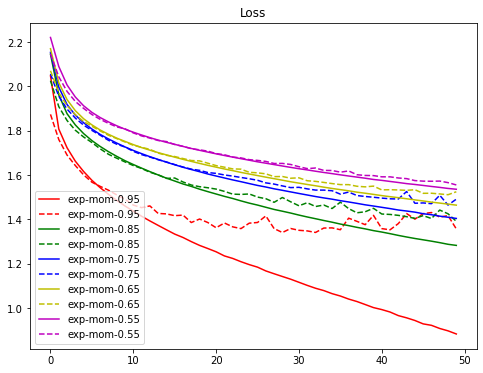

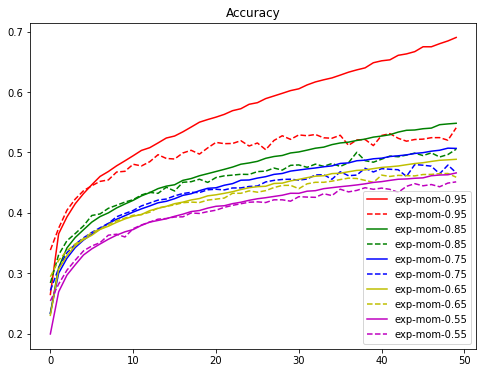

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    #print(cond, '->', range(len(results[cond]['train_loss'])))
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    
plt.title("Loss")
plt.legend()
plt.show()    

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## use SGD as optimizer whose nesterov is false

In [33]:
keras.backend.clear_session() # cleard old Graph
print("Experiment with MOMENTUM = ", mom)
print("x_train.shape[1:] : ", x_train.shape[1:])
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate=LEARNING_RATE, nesterov=False, momentum=0.85)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, 
          y_train,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (x_test, y_test),
          shuffle=True )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

exp_name_tag = "nesterov is False"
results[exp_name_tag] = {'train_loss': train_loss,
                         'valid_loss': valid_loss,
                         'train_acc': train_acc,
                         'valid_acc': valid_acc}

Experiment with MOMENTUM =  0.55
x_train.shape[1:] :  (3072,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 5

196/196 [==============================] - 3s 17ms/step - loss: 1.2685 - accuracy: 0.5539 - val_loss: 1.3853 - val_accuracy: 0.5087


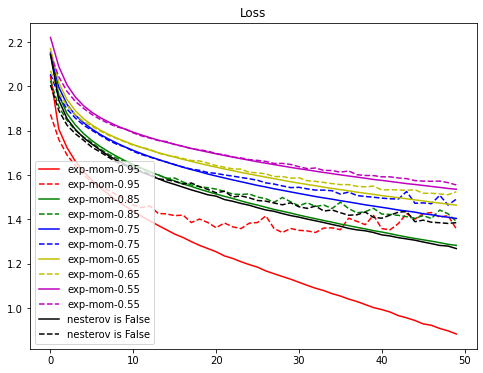

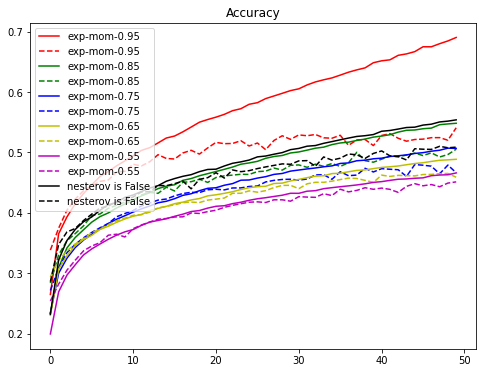

In [34]:
plt.figure(figsize=(8,6))

for i, cond in enumerate(results.keys()):
    #print(cond, '->', range(len(results[cond]['train_loss'])))
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    
plt.title("Loss")
plt.legend()
plt.show()    

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()